#August 2015 
#Author: FBB

#reproduce the result in http://www.mdrc.org/sites/default/files/What%20Strategies%20Work%20for%20the%20Hard%20FR.pdf 


Populating the interactive namespace from numpy and matplotlib


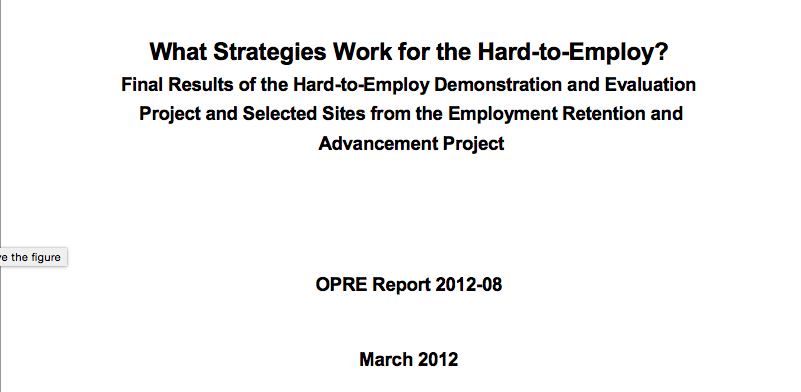

In [7]:
import os
import sys
import numpy as np
import pylab as pl


import json
s = json.load( open("fbb_matplotlibrc.json") )
pl.rcParams.update(s)

%pylab inline

from IPython.display import Image
Image(filename='NYCReentryprogram_title.png')



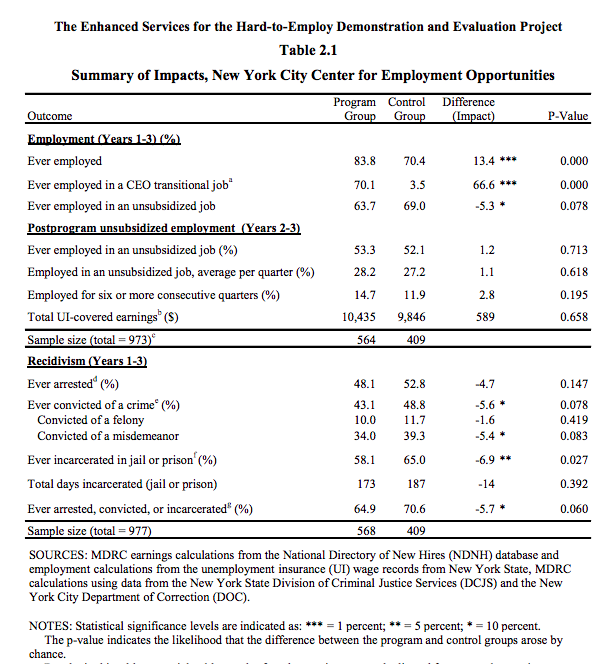

In [62]:
Image(filename='NYCReentryprogram.png')

#NULL HYPOTHESIS: the % of former prisoners employed after release is the same or lower for candidates who participated in the program as for the control group, significance level p=0.05

#$H_0: P_0 - P_1$ >   0
    
#$H_a: P_0 - P_1 \leq$ 0    
    
    
#$\alpha$ = 0.05    

##this is a TEST OF PROPORTIONS. we use the Binomial distribution since it is a yes/no (bernulli) test for each subject: the former inmate was or was not ever employed in a CEO transitional job (second row in the table above):
#$P_0=0.035, P_1=0.701$

In [61]:

alpha=0.05
P_0=3.5*0.01
P_1=70.1*0.01
n_0=409
n_1=564



#sample proportion sp: 

In [26]:
sp=(P_0*n_0+P_1*n_1)/(n_1+n_0)
print sp

0.421047276465


#Binomial standard deviation of the sampling distribution: $\sqrt{\frac{p(1 - p)}{n}}$
    

In [40]:
sp_stdev= lambda p0, n1: np.sqrt(p0*(1-p0)/n1)
sp_stdev_2y=sp_stdev(P_0,n_1)
print P_0,n_1,sp_stdev_2y

0.035 564 0.00773852387559 0.00773852387559


#z score: how many standard deviation away from the population parameter is my statistic?

#$z=\frac{P_1-P_0}{\sigma}$

In [45]:
zscore = lambda p0, p1, s : (p0-p1)/s
z_2y = zscore(P_0, P_1, sp_stdev_2y)
print z_2y


-86.0629250109


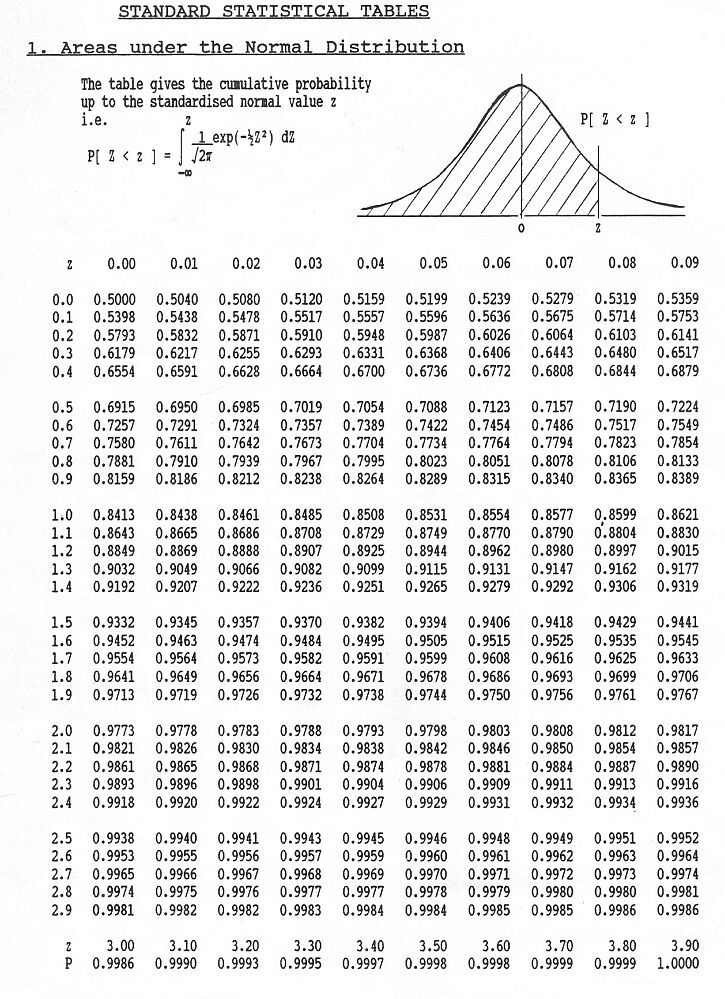

In [46]:
Image('http://intersci.ss.uci.edu/wiki/images/3/3a/Normal01.jpg')

#if $p<\alpha$ : reject H0

In [55]:
p_2y=1-0.9998

def report_result(p,a):
    print 'is the p value {0:.2f} smaller than the critical value {1:.2f}? '.format(p,a)
    if p<a:
        print "YES!"
    else: print "NO!"
    
    print 'the Null hypothesis is {}'.format( 'rejected' if p<a  else 'not rejected') 

    
report_result(p_2y,alpha)

is the p value 0.00 smaller than the critical value 0.05? 
YES!
the Null hypothesis is rejected


#what if we used the values for where the former inmate was or was not ever employed in a CEO transitional job 3 years after release (5th row of the table)? 

#$P_0 = 27.2, P_1= 28.2$

In [56]:
P_0=27.2*0.01
P_1=28.2*0.01
sp_stdev_3y=sp_stdev(P_0,n_1)
print P_0,n_1,sp_stdev_3y

z_3y = zscore(P_0, P_1, sp_stdev_3y)
print z_3y


0.272 564 0.0187374544317
-0.533690423981


In [57]:
p_3y=1-0.7088

    
report_result(p_3y,alpha)

is the p value 0.29 smaller than the critical value 0.05? 
NO!
the Null hypothesis is not rejected


##this can also be done with the $\chi^2$ distribution, see "Statistics In a Nutshell Chapter 4"